# WeatherPy
----


In [3]:
%matplotlib inline

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import os
import scipy.stats as sts
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [6]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

629

### Perform API Calls

* Perform a weather check on each city using a series of successive API calls.

* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [8]:
#counter for city numbers
counter = 1

#variables for weather data frame
city_name = []
country = []
lat = []
long = []
temp_imperial = []
humidity = []
cloudiness = []
wind_speed = []

print('Beginning City Data Retrieval')
print('------------------------------')
# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
        #city = str.title()
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp_imperial.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        #print result city
        print(f'Processing Record #{counter} of #{len(cities)} initial results | {city}')
        #set counter
        counter = counter + 1
    except (KeyError, IndexError):
        print(f"City data for record #{counter} not found. Skipping...")
        counter = counter


#("city")str.title()
print('------------------------------')
print(f"End of City Data Retrieval. Total Weather Records Retrieved from original {len(cities)} is {counter}")
print('------------------------------')

Beginning City Data Retrieval
------------------------------
Processing Record #1 of #629 initial results | geraldton
Processing Record #2 of #629 initial results | upernavik
Processing Record #3 of #629 initial results | lavrentiya
Processing Record #4 of #629 initial results | barrow
Processing Record #5 of #629 initial results | hermanus
Processing Record #6 of #629 initial results | sabang
Processing Record #7 of #629 initial results | gdov
Processing Record #8 of #629 initial results | pitimbu
Processing Record #9 of #629 initial results | mataura
Processing Record #10 of #629 initial results | kaeo
Processing Record #11 of #629 initial results | faanui
Processing Record #12 of #629 initial results | rikitea
Processing Record #13 of #629 initial results | namatanai
Processing Record #14 of #629 initial results | busselton
Processing Record #15 of #629 initial results | shar
Processing Record #16 of #629 initial results | isetskoye
Processing Record #17 of #629 initial results | qa

### Convert Raw Data to DataFrame

In [7]:
city_data_df = pd.DataFrame({'City': city_name,
                             'Country': country,
                            'Latitude': lat,
                            'Longitude': long,
                            'Temp': temp_imperial,
                            'Humidity': humidity,
                            'Cloudiness': cloudiness,
                            'Wind Speed': wind_speed
                            })

* Export the city data into a .csv.

In [8]:
pd.DataFrame.to_csv(city_data_df, '../output_data/city_weather_data.csv')

* Display the DataFrame

In [9]:
city_data_df.head()

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,-21.36,55.77,56.79,82,75,4.70
1,Flin Flon,CA,54.77,-101.86,75.20,50,40,8.05
2,Bredasdorp,ZA,-34.53,20.04,57.20,87,0,8.05
3,Lebu,CL,-37.62,-73.65,53.31,78,100,11.54
4,New Norfolk,AU,-42.78,147.06,43.29,85,100,1.99


In [10]:
len(city_data_df)

563

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#Get the indices of cities that have humidity over 100%.
#checking for High Humidity Cities and confirming visually
city_data_h_humid = city_data_df[city_data_df['Humidity'] > 99]
city_data_h_humid

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
79,Marabu,MY,4.41,114.01,78.40,100,40,1.12
190,Batemans Bay,AU,-35.72,150.18,35.01,100,0,3.44
192,Krasnokamsk,RU,58.08,55.75,60.80,100,40,2.24
197,George Town,MY,5.41,100.34,77.65,100,40,4.70
218,Carnarvon,AU,-24.87,113.63,59.00,100,0,9.17
234,Hasaki,JP,35.73,140.83,73.15,100,75,5.82
245,Nelson Bay,AU,-32.72,152.15,45.14,100,23,5.82
266,Tānsen,NP,27.87,83.55,64.22,100,99,2.37
280,Nagua,DO,19.38,-69.85,78.80,100,75,11.41
314,Idenao,CM,4.25,9.00,77.00,100,40,2.98


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
#Dropping rows of the High Humidity Cities if they exist and confirming the database count is lower.
clean_city_data = city_data_df.drop(city_data_df[city_data_df['Humidity'] > 99].index, inplace = False)
len(clean_city_data)

546

In [14]:
# Extract relevant fields from the data frame
clean_city_data.reset_index(drop=True, inplace=True)
clean_city_data

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,-21.36,55.77,56.79,82,75,4.70
1,Flin Flon,CA,54.77,-101.86,75.20,50,40,8.05
2,Bredasdorp,ZA,-34.53,20.04,57.20,87,0,8.05
3,Lebu,CL,-37.62,-73.65,53.31,78,100,11.54
4,New Norfolk,AU,-42.78,147.06,43.29,85,100,1.99
...,...,...,...,...,...,...,...,...
541,Mugumu,TZ,-1.85,34.70,66.56,65,91,2.55
542,Atikokan,CA,48.76,-91.62,56.84,93,100,6.22
543,Busembatia,UG,0.77,33.61,67.77,82,95,2.10
544,Rock Sound,BS,24.90,-76.20,82.98,79,97,14.18


In [15]:
# Export the City_Data into a csv
pd.DataFrame.to_csv(clean_city_data, '../output_data/clean_city_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

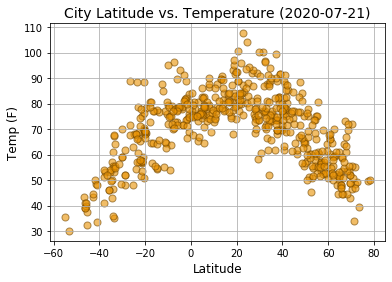

In [16]:
#I perfer to drop the alpha a bit. The overlay of the plots display a nice density.
plt.scatter(clean_city_data['Latitude'], clean_city_data['Temp'],
            marker="o", s=50, facecolors='#E99202', edgecolors='#754901', alpha=0.6)
plt.title(f"City Latitude vs. Temperature ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temp (F)", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_temp.png', bbox_inches='tight')
plt.show()


# Analysis of the Latitude vs. Temp Plot
* This scatter plot clearly depicts the rise of temperature from the Southern Hemisphere's lowest latitude (-60) to the equator (0) and the Northern's highest latitude (80) to the equater (0).
* We can also cleary see there are more cities, in general, in the Northern Hemisphere.

## Latitude vs. Humidity Plot

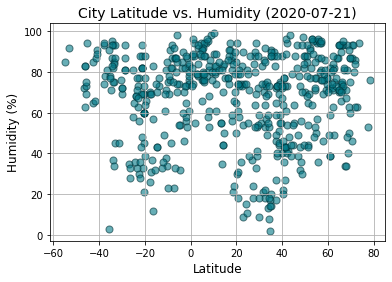

In [20]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'],
            marker="o", s=50, facecolors='#027886', edgecolors='#003036', alpha=0.6)
plt.title(f"City Latitude vs. Humidity ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_humidity.png', bbox_inches='tight')
plt.show()

# Analysis of the Latitude vs. Humidity Plot
* This scatter plot shows that humidity level, world wide, has low correlation to latitude.
* Lower levels Humiduty and higher variance of Humidity, are recorded closer to the equator.

## Latitude vs. Cloudiness Plot

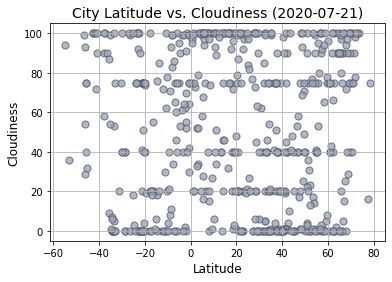

In [21]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'],
            marker="o", s=50, facecolors='#9DA5B9', edgecolors='#575C69', alpha=0.8)
plt.title(f"City Latitude vs. Cloudiness ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_clouds.png', bbox_inches='tight')
plt.show()

# Analysis of the Latitude vs. Cloudiness Plot
* This scatter plot shows that Cloudiness level, world wide, has low correlation to latitude.

## Latitude vs. Wind Speed Plot

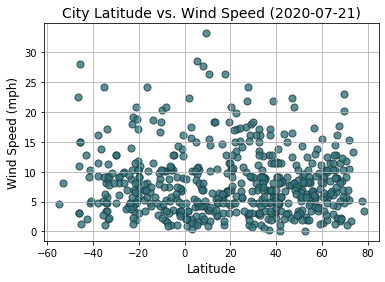

In [22]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind Speed'],
            marker="o", s=50, facecolors='#33747C', edgecolors='#1B3C40', alpha=0.8)
plt.title(f"City Latitude vs. Wind Speed ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_wind.png', bbox_inches='tight')
plt.show()

# Analysis of the Latitude vs. Wind Speed Plot
* This scatter plot shows that Wind Speed, world wide, has low correlation to latitude.

## Linear Regression Latitude vs. Temperature Plot

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots

The correlation between Latitude 
and Temperature is 0.0


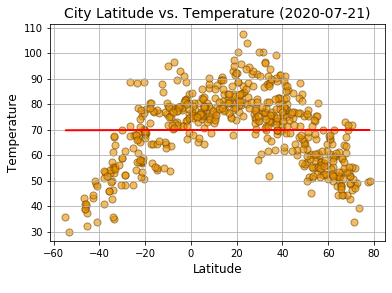

In [24]:
# Calculate the correlation coefficient and linear regression model 
lat_line = clean_city_data.iloc[:,2]
temp_lin = clean_city_data.iloc[:,4]
correlation = sts.pearsonr(lat_line,temp_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = clean_city_data['Latitude']
y_values = clean_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"City Latitude vs. Temperature ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.grid(True)
#plt.tight_layout()
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#E99202', edgecolors='#754901', alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The correlation between Latitude {nreturn}and Temperature is {round(correlation[0],2)}")

plt.savefig("../images/lat_temp_lin_regress.png", bbox_inches = 'tight', dpi=100)
plt.show()


# Analysis: Linear regression of the City Latitude vs Temperature plot
* The data in this plot depicts no "standard" linear regression. 
* In this case the plot depicts two distinct arc values in the plotted data. 
* We would be best showing multi-regression lines on this plot for each hemisphere's latitude range.

# Create Northern and Southern Hemisphere DataFrames

In [25]:
#Southern Latitude Database creation
slat_city_data = clean_city_data.drop(clean_city_data[clean_city_data['Latitude'] >= 0].index, inplace = False)
len(slat_city_data)

169

In [26]:
# Extract relevant fields from the southern lat dataframe
slat_city_data.reset_index(drop=True, inplace=True)
slat_city_data

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,-21.36,55.77,56.79,82,75,4.70
1,Bredasdorp,ZA,-34.53,20.04,57.20,87,0,8.05
2,Lebu,CL,-37.62,-73.65,53.31,78,100,11.54
3,New Norfolk,AU,-42.78,147.06,43.29,85,100,1.99
4,Hithadhoo,MV,-0.60,73.08,83.93,76,64,9.01
...,...,...,...,...,...,...,...,...
164,Kilindoni,TZ,-7.91,39.67,77.05,75,34,20.85
165,Kununurra,AU,-15.77,128.73,55.40,32,1,10.16
166,Mizque,BO,-17.94,-65.34,78.46,26,100,7.99
167,Pisco,PE,-13.70,-76.22,65.53,77,20,11.41


In [27]:
#Northern Latitude Database creation
nlat_city_data = clean_city_data.drop(clean_city_data[clean_city_data['Latitude'] <= 0].index, inplace = False)
len(nlat_city_data)

377

In [2]:
# Extract relevant fields from the northern lat dataframe
nlat_city_data.reset_index(drop=True, inplace=True)
nlat_city_data

NameError: name 'nlat_city_data' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between N. Hemisphere 
and Temperature is -0.68


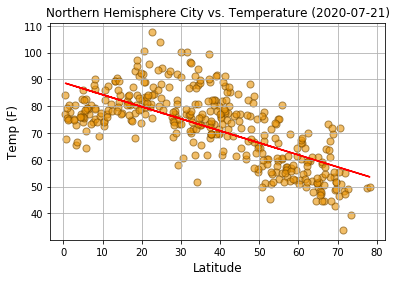

In [29]:
from scipy.stats import linregress
# Calculate the correlation coefficient and linear regression model 
lat_line = nlat_city_data.iloc[:,2]
temp_lin = nlat_city_data.iloc[:,4]
correlation = sts.pearsonr(lat_line,temp_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = nlat_city_data['Latitude']
y_values = nlat_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Northern Hemisphere City vs. Temperature ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temp (F)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#E99202', edgecolors="#754901", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between N. Hemisphere {nreturn}and Temperature is {round(correlation[0],2)}")

plt.savefig("../images/nhem_temp_lin_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


# Analysis: N. Hemisphere Linear regression of Latitude vs Temperature plot
* The data shows a moderate linear relationship in temperature. The temp lowering as you get father away from the equator. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between S. Hemisphere 
and Temperature is 0.8


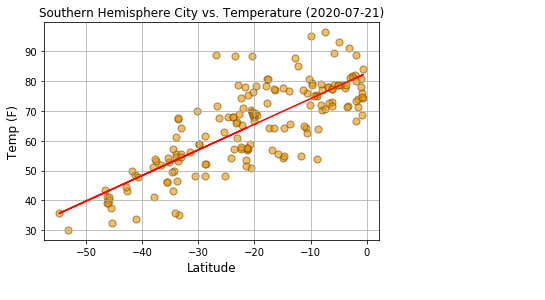

In [30]:
from scipy.stats import linregress
# Calculate the correlation coefficient and linear regression model 
lat_line = slat_city_data.iloc[:,2]
temp_lin = slat_city_data.iloc[:,4]
correlation = sts.pearsonr(lat_line,temp_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = slat_city_data['Latitude']
y_values = slat_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Southern Hemisphere City vs. Temperature ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temp (F)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#E99202', edgecolors="#754901", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between S. Hemisphere {nreturn}and Temperature is {round(correlation[0],2)}")

plt.savefig("../images/shem_temp_lin_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


# Analysis: S. Hemisphere Linear regression of Latitude vs Temperature plot
* The data shows a strong linear relationship in temperature. The temp rising as you get closer to the equator.
* This Southern linear relationship (0.8) may be slightly stronger than the Northern's linear relationship (-0.68), because of the winter and less cities. More research should be done on this possible correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between N. Hemisphere 
and Humidity is 0.01


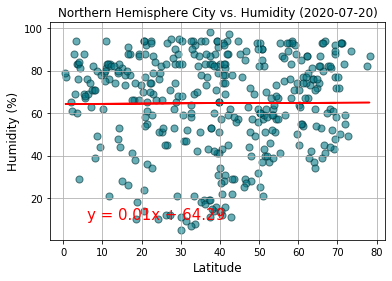

In [29]:
# Calculate the correlation coefficient and linear regression model 
lat_line = nlat_city_data.iloc[:,2]
humidity_lin = nlat_city_data.iloc[:,5]
correlation = sts.pearsonr(lat_line,humidity_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = nlat_city_data['Latitude']
y_values = nlat_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Northern Hemisphere City vs. Humidity ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#027886', edgecolors="#003036", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between N. Hemisphere {nreturn}and Humidity is {round(correlation[0],2)}")

plt.savefig("../images/nhem_humidity_lin_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


# Analysis: N. Hemisphere Linear regression of Latitude vs Humidity plot
* The data shows a weak linear relationship in Humidity. .
* This is not suprising because humidity has high vaiance world wide. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between S. Hemisphere 
and Humidity is -0.13


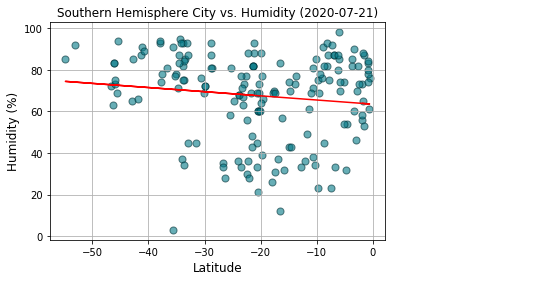

In [31]:
# Calculate the correlation coefficient and linear regression model 
lat_line = slat_city_data.iloc[:,2]
humidity_lin = slat_city_data.iloc[:,5]
correlation = sts.pearsonr(lat_line,humidity_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = slat_city_data['Latitude']
y_values = slat_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Southern Hemisphere City vs. Humidity ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#027886', edgecolors="#003036", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between S. Hemisphere {nreturn}and Humidity is {round(correlation[0],2)}")

plt.savefig("../images/shem_humidity_lin_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


# Analysis: S. Hemisphere Linear regression of Latitude vs Humidity plot
* The data shows a weak linear relationship in Humidity. .
* This is not suprising because humidity has high variance world wide. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [1]:
# Calculate the correlation coefficient and linear regression model 
lat_line = nlat_city_data.iloc[:,2]
cloud_lin = nlat_city_data.iloc[:,6]
correlation = sts.pearsonr(lat_line,cloud_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = nlat_city_data['Latitude']
y_values = nlat_city_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Northern Hemisphere City vs. Cloudiness ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#9DA5B9', edgecolors="#575C69", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between N. Hemisphere {nreturn}and Cloudiness is {round(correlation[0],2)}")

plt.savefig("../images/nhem_cloudiness_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


NameError: name 'nlat_city_data' is not defined

# Analysis: N. Hemisphere Linear regression of Latitude vs Cloudiness plot
* The data shows a weak linear relationship in Cloudiness. .
* This is not suprising because Cloudiness has high variance world wide. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between S. Hemisphere 
and Cloudiness is -0.03


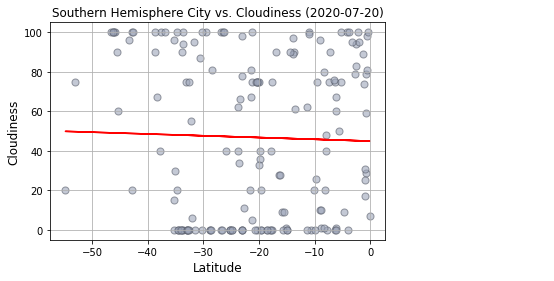

In [32]:
# Calculate the correlation coefficient and linear regression model 
lat_line = slat_city_data.iloc[:,2]
cloud_lin = slat_city_data.iloc[:,6]
correlation = sts.pearsonr(lat_line,cloud_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = slat_city_data['Latitude']
y_values = slat_city_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Southern Hemisphere City vs. Cloudiness ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#9DA5B9', edgecolors="#575C69", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between S. Hemisphere {nreturn}and Cloudiness is {round(correlation[0],2)}")

plt.savefig("../images/shem_cloudiness_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


# Analysis: S. Hemisphere Linear regression of Latitude vs Cloudiness plot
* The data shows a weak linear relationship in Cloudiness. .
* This is not suprising because Cloudiness has high variance world wide. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between N. Hemisphere 
and Wind Speed is -0.21


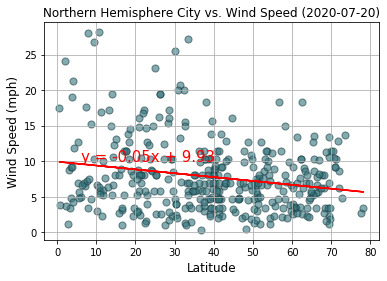

In [33]:
# Calculate the correlation coefficient and linear regression model 
lat_line = nlat_city_data.iloc[:,2]
cloud_lin = nlat_city_data.iloc[:,7]
correlation = sts.pearsonr(lat_line,cloud_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = nlat_city_data['Latitude']
y_values = nlat_city_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Northern Hemisphere City vs. Wind Speed ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#33747C', edgecolors='#1B3C40', alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between N. Hemisphere {nreturn}and Wind Speed is {round(correlation[0],2)}")

plt.savefig("../images/nhem_wind_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


# Analysis: N. Hemisphere Linear regression of Latitude vs Wind Speed plot
* The data shows a weak linear relationship in Wind Speed. .
* This is not suprising because Wind Speed has high variance world wide.
* There seems to be some higher rates of Wind Speed near the equator

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between S. Hemisphere 
and Wind Speed is -0.11


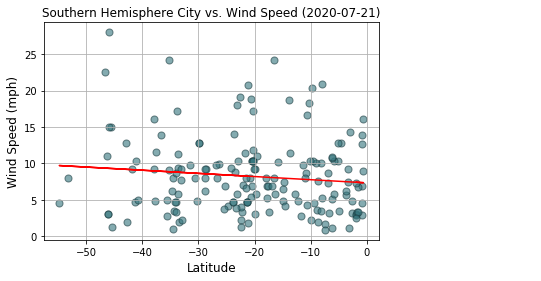

In [32]:
# Calculate the correlation coefficient and linear regression model 
lat_line = slat_city_data.iloc[:,2]
cloud_lin = slat_city_data.iloc[:,7]
correlation = sts.pearsonr(lat_line,cloud_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = slat_city_data['Latitude']
y_values = slat_city_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Southern Hemisphere City vs. Wind Speed ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#33747C', edgecolors='#1B3C40', alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between S. Hemisphere {nreturn}and Wind Speed is {round(correlation[0],2)}")

plt.savefig("../images/shem_wind_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


# Analysis: S. Hemisphere Linear regression of Latitude vs Wind Speed plot
* The data shows a weak linear relationship in Wind Speed. .
* This is not suprising because Wind Speed has high variance world wide.
* There seems to be some higher rates of Wind Speed near the South Pole. This could be because it is currently winter in the Southern Hemisphere.